In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def portrait_plot(array1, array2, array3, array4, x_labels, y_labels, group_names=['A1', 'A2', 'A3', 'A4'], colormap='viridis'):
    """
    Plot a portrait heatmap with four 2D arrays, each cell divided into 4 triangles.

    Parameters:
    - array1: 2D numpy array, values for the top triangle (A1)
    - array2: 2D numpy array, values for the right triangle (A2)
    - array3: 2D numpy array, values for the bottom triangle (A3)
    - array4: 2D numpy array, values for the left triangle (A4)
    - x_labels: List of strings for the x-axis labels
    - y_labels: List of strings for the y-axis labels
    - group_names: List of 4 strings representing the names of each group/array for the legend
    - colormap: String, optional, colormap to use for the heatmap (default is 'viridis')
    """
    # Ensure all arrays have the same shape
    assert array1.shape == array2.shape == array3.shape == array4.shape, "All input arrays must have the same shape."
    
    # Ensure there are exactly four group names provided
    assert len(group_names) == 4, "Four group names must be provided."
    
    # Number of rows and columns in the input arrays
    rows, cols = array1.shape

    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(10, 8))

    # Iterate over each cell in the grid
    for i in range(rows):
        for j in range(cols):
            # Retrieve the values for the current cell from each array
            val1 = array1[i, j]  # Value for the top triangle
            val2 = array2[i, j]  # Value for the right triangle
            val3 = array3[i, j]  # Value for the bottom triangle
            val4 = array4[i, j]  # Value for the left triangle
            
            # Define vertices of triangles for each array value in the cell
            triangles = [
                [(j, i), (j + 1, i), (j + 0.5, i + 0.5)],  # Top triangle (A1)
                [(j + 1, i), (j + 1, i + 1), (j + 0.5, i + 0.5)],  # Right triangle (A2)
                [(j + 1, i + 1), (j, i + 1), (j + 0.5, i + 0.5)],  # Bottom triangle (A3)
                [(j, i + 1), (j, i), (j + 0.5, i + 0.5)],  # Left triangle (A4)
            ]
            
            # Map values to colors using the specified colormap
            colors = [
                plt.colormaps[colormap](val1),  # Color for the top triangle (A1)
                plt.colormaps[colormap](val2),  # Color for the right triangle (A2)
                plt.colormaps[colormap](val3),  # Color for the bottom triangle (A3)
                plt.colormaps[colormap](val4),  # Color for the left triangle (A4)
            ]
            
            # Plot each triangle with the corresponding color
            for tri, color in zip(triangles, colors):
                triangle = plt.Polygon(tri, color=color)
                ax.add_patch(triangle)

    # Set the axis limits to encompass all cells
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)

    # Set the aspect ratio to be equal to ensure square cells
    ax.set_aspect('equal')

    # Configure the x and y axis with labels positioned at the center of each cell
    ax.set_xticks(np.arange(0.5, cols, 1))
    ax.set_yticks(np.arange(0.5, rows, 1))
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)

    # Create a color bar to represent the data values
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=colormap), ax=ax, orientation='vertical')
    cbar.set_label('Value')  # Label for the color bar

    # Create a legend to describe each group represented by triangles in the plot
    legend_elements = [
        Patch(facecolor='none', edgecolor='black', label=f'{group_names[0]} (Top)'),
        Patch(facecolor='none', edgecolor='black', label=f'{group_names[1]} (Right)'),
        Patch(facecolor='none', edgecolor='black', label=f'{group_names[2]} (Bottom)'),
        Patch(facecolor='none', edgecolor='black', label=f'{group_names[3]} (Left)')
    ]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.2, 1), title='Array Legend')

    # Show the plot
    plt.gca().invert_yaxis()  # Optional: invert y-axis to match array indexing convention
    plt.title('Portrait Plot of Four 2D Arrays')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    plt.show()


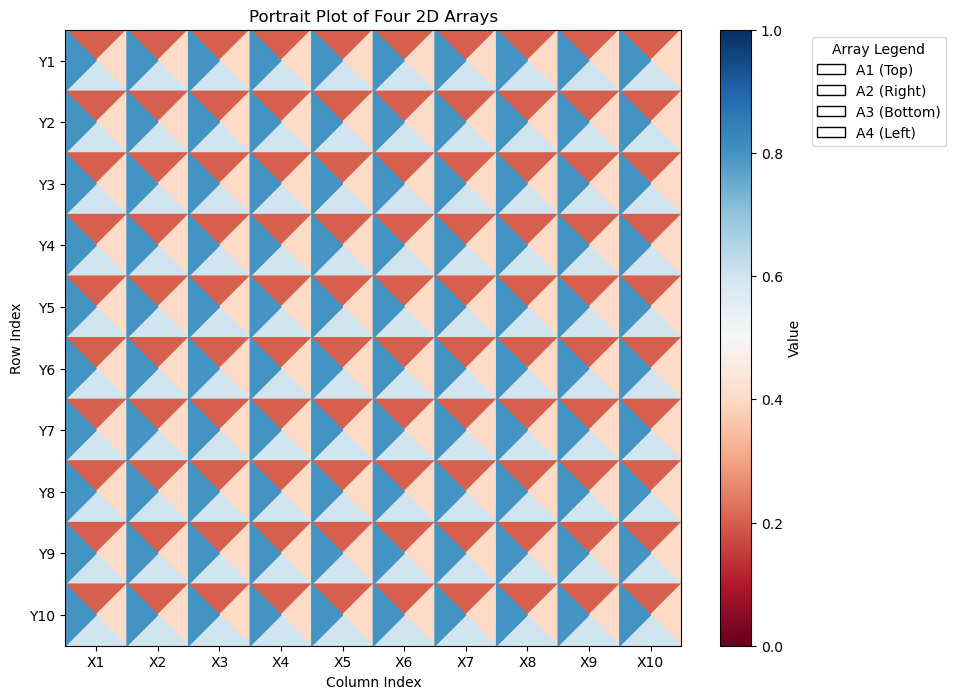

In [40]:
# Example usage with dummy data
array1 = np.ones((10, 10)) * 0.2
array2 = np.ones((10, 10)) * 0.4
array3 = np.ones((10, 10)) * 0.6
array4 = np.ones((10, 10)) * 0.8

# Number of rows and columns
rows, cols = array1.shape

# Labels for the x and y axis
x_labels = [f'X{i+1}' for i in range(cols)]
y_labels = [f'Y{i+1}' for i in range(rows)]

# Call the function with default colormap 'viridis'
portrait_plot(array1, array2, array3, array4, x_labels, y_labels, colormap='RdBu')

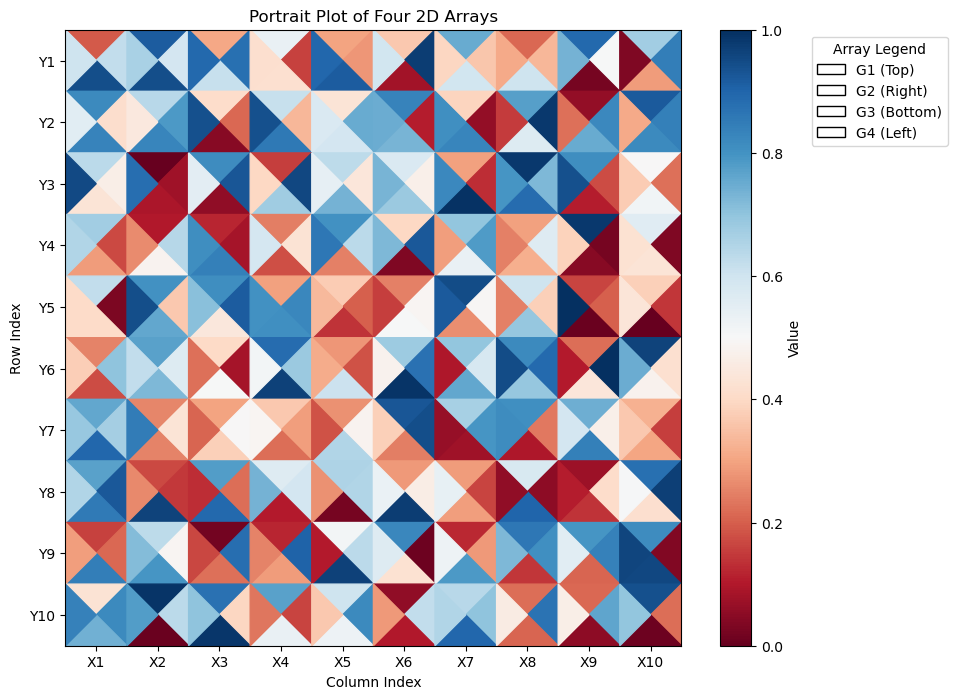

In [41]:
# Example usage with dummy data
array1 = np.random.rand(10, 10)
array2 = np.random.rand(10, 10)
array3 = np.random.rand(10, 10)
array4 = np.random.rand(10, 10)

# Number of rows and columns
rows, cols = array1.shape

# Labels for the x and y axis
x_labels = [f'X{i+1}' for i in range(cols)]
y_labels = [f'Y{i+1}' for i in range(rows)]

# Call the function with default colormap 'viridis'
portrait_plot(array1, array2, array3, array4, x_labels, y_labels, group_names=['G1', 'G2', 'G3', 'G4'], colormap='RdBu')